# A complete end to end medical Insurance price perdiction

## 1. Problem
> Using different attribut and from old datas trying to predict a medical price for the patient

## 2. Data
> The data used from kaggle 

## 3. Features

* age:
* sex:
* bmi: (body mass index) is calculated mass/(height)^2
* children:
* smoker: binary 
* region: 
* charges:

## 4. Evaluation
> Trying to predict the charge with the minimum (absolute mean squared error)



In [1]:
## first lets import tools for our EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## lets import the data from datas/

insurance = pd.read_csv('datas/insurance.csv')

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# lets see if there is a null value
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
insurance.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\ABDU\AppData\Local\Temp\ipykernel_3172\4056025500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_corr = insurance.corr()


<AxesSubplot: >

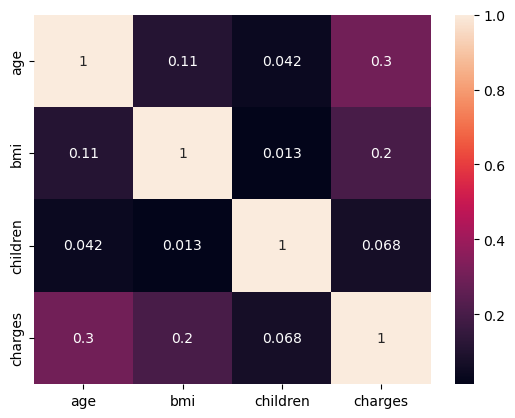

In [9]:
#We dont 
insurance_corr = insurance.corr()
sns.heatmap(insurance_corr,annot=True)

In [10]:
# lets change an object column to numeric
X = insurance.drop('charges',axis=1)
y = insurance.charges

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [12]:

def preprocess(X):
    categorical_features = ['sex','smoker','region']
    
    one_hot = OneHotEncoder()
    
    transformer = ColumnTransformer([
        ('one_hot',one_hot,categorical_features)],remainder='passthrough')
    return transformer.fit_transform(X)

In [13]:
X = preprocess(X)
X

array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

In [14]:
## Now we changed our object column to numeric lets import our model and train our data

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV


In [15]:
np.random.seed(42)

model = RandomForestRegressor()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8636580268683889

In [16]:
from xgboost import XGBRFRegressor

xgb_model = XGBRFRegressor()

xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [34]:
y_pred = xgb_model.predict(X_test)
r2_score(y_test,y_pred)

0.8753551988943444

In [37]:
mean_absolute_error(y_test,y_pred)

2483.953921597248